> # **Parcial 1 Análisis Avanzado de Datos**
> ### **Punto 1**

> **Julián Castro**
>
> **Ximena Rojas**
>
> **Sofia Rincón Sierra**

---

# **Comentarios**

## Análisis Exploratorio de Datos
Deben visualizar la relación entre las diferentes características y la variable objetivo ("Age"). Además, deben verificar la correlación entre las características y la variable objetivo.

**Comentarios**

lleva a cabo un análisis de correlación entre las características y la variable objetivo, 'Age', llegando a la conclusión de que 'Shell Weight', 'Length' y 'Diameter' son las más relevantes. Sin embargo, el análisis omite considerar la correlación existente entre las características mismas, lo cual es crucial para evitar problemas de multicolinealidad en el modelo. Específicamente, 'Length' y 'Diameter' muestran una alta correlación entre ellas, lo que podría introducir multicolinealidad y, en consecuencia, comprometer la estabilidad y la interpretación del modelo de regresión.

**Puntos o totales: 6/10**

## Construcción del Modelo:
Deben construir un modelo de regresión, que puede ser lineal múltiple o polinomial, para predecir la edad del cangrejo. Deben evaluar el modelo utilizando métricas como RMSE y MAE.


**Comentarios**

#### **Selección de Características**

Tiene tres caracteristicas de las cuales dos son muy correlacionadas


#### **Validación**

Se presenta dos modelos de regresión en su análisis, ambos de los cuales parecen válidos en el contexto dado. Sin embargo, no se ofrece una justificación clara en el código para la elección de estos dos modelos específicos, ni se exploran otros modelos alternativos que podrían haber sido pertinentes.

El análisis no aborda de manera exhaustiva posibles problemas relacionados con la validación del modelo, especialmente considerando que varias características del dataset están altamente correlacionadas.

Hay omisión de un análisis diferenciado entre machos, hembras e individuos de sexo indeterminado, lo cual podría ser relevante para el objetivo de predecir la edad de los cangrejos de manera precisa.


**Puntos o totales: 18/25**


##Entrenamiento Final y Evaluación:

La sección del entrenamiento final en el análisis es un tanto ambigua. Realizan una nueva división de los datos y se opta inesperadamente por incluir todas las características en el modelo, sin ofrecer una justificación clara para este cambio. Esta inconsistencia podría afectar la interpretación y confiabilidad de los resultados finales.

**Puntos o totales: 9/15**



> Primero importamos la librerías necesarias

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

> **Lectura de CSV**
>
>Para abordar este problema de predicción de la edad de los cangrejos basado en características físicas, primero vamos a realizar un análisis exploratorio de datos para comprender la relación entre las diferentes características y la variable objetivo "Age".

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('CrabAgePrediction_Subset1.csv')
list(df.columns)

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight',
 'Age']

> Calculamos la correlación entre las características numéricas y la edad. Esto te ayudará a identificar las características que están más relacionadas con la edad.

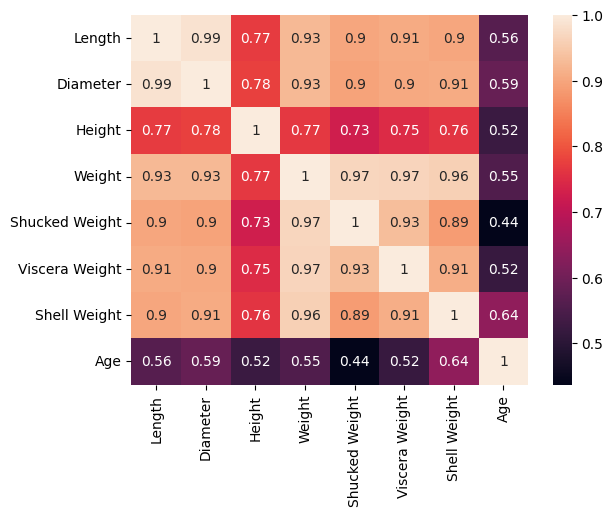

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

>Dado que los coeficientes de correlación de Shell Wight, Length y Diameter son los más altos en la matriz de correlación, estas tres características parecen ser las más relevantes para predecir la edad de los cangrejos.
>
>Sin embargo realizaremos unos graficos para visualizar mejor esta relación

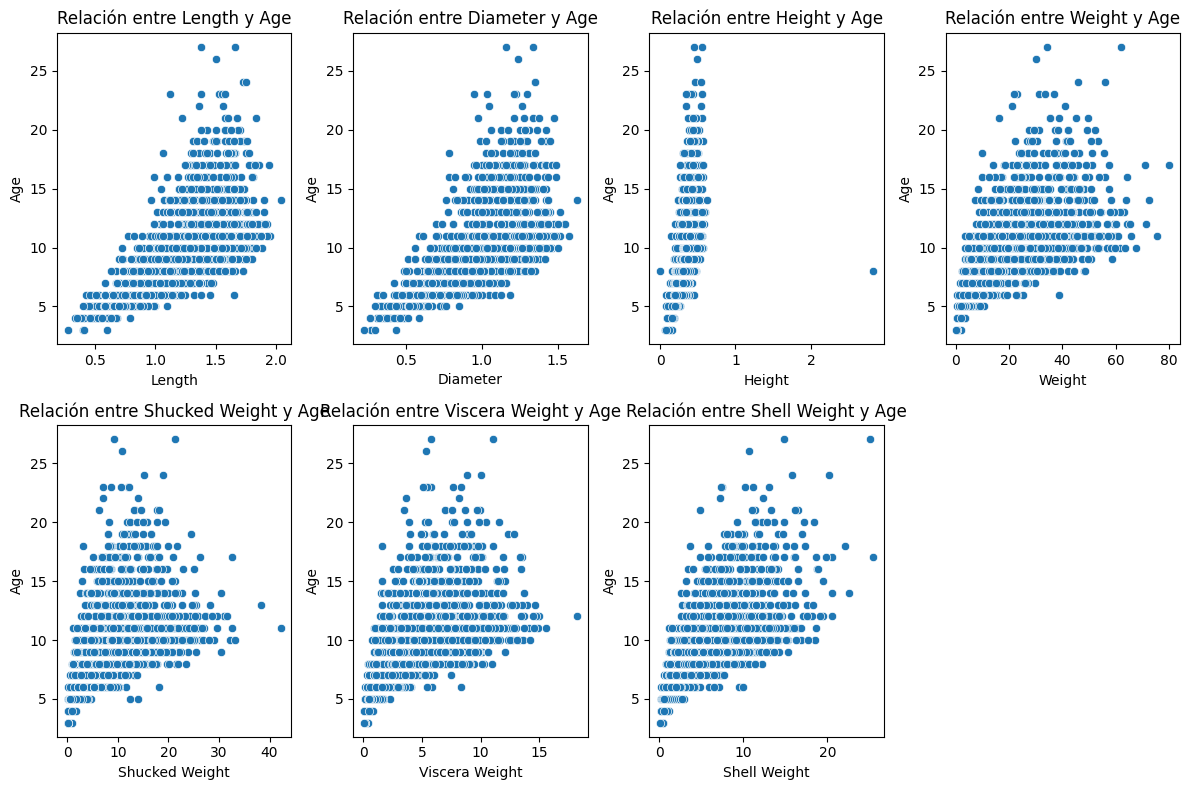

In [ ]:
data = df.drop('Sex', axis=1)

X = data.drop('Age', axis=1)
y = data['Age']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 4, i + 1)
    sns.scatterplot(x=X[feature], y=y)
    plt.title(f'Relación entre {feature} y Age')

plt.tight_layout()
plt.show()

> Estos graficos nos corroboran la información que tambien nos dice la matriz de correlación. Todos las caracteristicas tienen un relación positiva con la edad, es decir que por ejemplo entre mas pesada sea la concha del cangrejo mas viejos tienden a ser.

> **Modelo de regresión para predecir la edad**
>
>Primero se crea un nuevo DataFrame llamado X que contiene las columnas seleccionadas 'Length', 'Diameter' y 'Shell Weight' del conjunto de datos original. Luego, se divide el conjunto de datos en conjuntos de entrenamiento y prueba (X_train, X_test, y_train, y_test) utilizando una proporción del 80% para entrenamiento y el 20% para prueba.
>
>A continuación, se entrena un modelo de regresión lineal múltiple en el conjunto de entrenamiento y se utiliza para hacer predicciones en el conjunto de prueba. Además, se crea un modelo de regresión polinomial de grado 2, se transforman las características en polinomiales y se entrena este modelo en el conjunto de entrenamiento.
>
>Cabe destacar, se realizaron pruebas con regresiones de mayor orden, sin embargo las metricas utilizadas indicaron que el grado 2 es la mejor opción


In [ ]:
selected_columns = ['Length', 'Diameter', 'Shell Weight']
X = data[selected_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_pred = poly_model.predict(X_test_poly)

> Se calculan métricas de calidad (RMSE y MAE) para evaluar el rendimiento de dos modelos de regresión diferentes: uno de regresión lineal múltiple y otro de regresión polinomial de grado 2. Se selecciona el mejor modelo en función del menor valor de RMSE.
>
> Si el RMSE del modelo de regresión lineal múltiple es menor que el del modelo polinomial, se selecciona el modelo de regresión lineal múltiple como el mejor y se almacena en best_model. En caso contrario, se selecciona el modelo polinomial y se almacena en best_model. El nombre del modelo seleccionado se guarda en best_model_name.

In [ ]:
# Calcular métricas RMSE y MAE para ambos modelos
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} MAE: {mae:.2f}")

print("Métricas de calidad:")
evaluate_model(y_test, linear_pred, "Regresión Lineal Múltiple")
evaluate_model(y_test, poly_pred, "Regresión Polinomial (grado 2)")

# Seleccionar el mejor modelo (menor RMSE)
if np.sqrt(mean_squared_error(y_test, linear_pred)) < np.sqrt(mean_squared_error(y_test, poly_pred)):
    best_model = linear_model
    best_model_name = "Regresión Lineal Múltiple"
else:
    best_model = poly_model
    best_model_name = "Regresión Polinomial (grado 2)"


Métricas de calidad:
Regresión Lineal Múltiple RMSE: 2.63
Regresión Lineal Múltiple MAE: 1.85
Regresión Polinomial (grado 2) RMSE: 2.53
Regresión Polinomial (grado 2) MAE: 1.77


> Imprimimos el mejor modelo

In [ ]:
print(f"El modelo seleccionado es {best_model_name}.")

# Coeficientes del modelo seleccionado (en el caso de regresión lineal múltiple)
if best_model_name == "Regresión Lineal Múltiple":
    print("\nCoeficientes del modelo:")
    for feature, coef in zip(X.columns, best_model.coef_):
        print(f"{feature}: {coef:.2f}")

El modelo seleccionado es Regresión Polinomial (grado 2).


> Con el modelo seleccionado volvemos a entrenar con todo el conjunto de datos

In [ ]:
X = data.drop('Age', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_model.fit(X_train, y_train)
poly_pred_2 = poly_model.predict(X_test)

> Definimos una función para evaluar el modelo e imprimir las métricas y coeficientes

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} MAE: {mae:.2f}")

print("Métricas de calidad:")
evaluate_model(y_test, poly_pred_2, "Regresión Lineal Múltiple")
print("\nCoeficientes del modelo:")
for feature, coef in zip(X.columns, poly_model.coef_):
    print(f"{feature}: {coef:.2f}")

Métricas de calidad:
Regresión Lineal Múltiple RMSE: 2.36
Regresión Lineal Múltiple MAE: 1.70

Coeficientes del modelo:
Length: -2.09
Diameter: 7.95
Height: 2.96
Weight: 0.17
Shucked Weight: -0.56
Viscera Weight: -0.13
Shell Weight: 0.44


In [5]:
#Las pruebas del profesor

crab_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023-2S-AAD-1Corte/datos_validar/CrabAgePrediction_Subset1.csv').dropna()
crab_data_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023-2S-AAD-1Corte/datos_validar/CrabAgePrediction_Subset2.csv').dropna()


X_train_val = crab_data.drop(columns=['Age','Sex'])
y_train_val = crab_data['Age']
X_test = crab_data_test.drop(columns=['Age','Sex'])
y_test = crab_data_test['Age']


selected_features = ['Length', 'Diameter', 'Shell Weight']

X_train_val = X_train_val[selected_features]
X_test = X_test[selected_features]


#Seleccion de polinomio
degree=2

# Transformar las características a polinomio de grado 2
poly = PolynomialFeatures(degree=degree)
X_train_val_poly = poly.fit_transform(X_train_val)
X_test_poly = poly.transform(X_test)

# Entrenar el modelo en el conjunto combinado de entrenamiento y validación
model = LinearRegression()
model.fit(X_train_val_poly, y_train_val)


# Hacer predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test_poly)

# Calcular RMSE y MAE
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_test_pred)


print(f'RMSE en el conjunto de prueba: {rmse_test}')
print(f'MAE en el conjunto de prueba: {mae_test}'),
model.coef_


RMSE en el conjunto de prueba: 2.3554209443155716
MAE en el conjunto de prueba: 1.6875211651844009


array([ 0.00000000e+00, -6.42082719e+00,  1.83521995e+01,  1.58959804e+00,
       -1.39141292e+01,  3.91859739e+01, -1.11970549e+00, -3.58775004e+01,
        1.05731056e+00, -1.24747851e-02])